In [2]:
import numpy as np
from math import gcd
import matplotlib.pyplot as plt

import ot
import ot.plot
import matplotlib.pylab as pl

# Local Imports
from utils import OT_solver, sim_OT, plot_func

### Example 1

In [3]:
n = 200
m = 300
P = np.array([[0, np.random.random()] for _ in range(n)])
Q = np.array([[np.random.choice([-1, 1]), np.random.random()] for _ in range(m)])

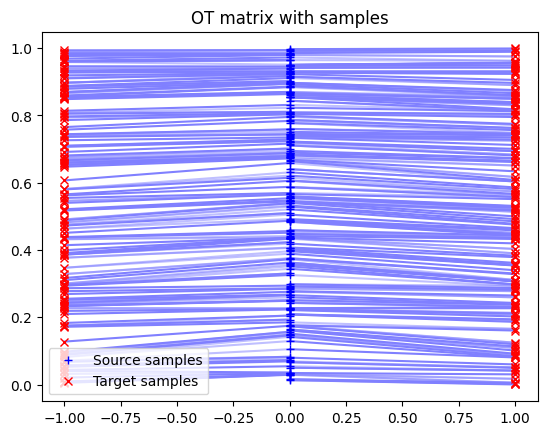

In [4]:
G0 = OT_solver(P,Q,m,n,fig_1=False,fig_3=False,fig_4=True)

## Simple examples

### Example 2

In [5]:
m,n = 30,20
it = 200
m_array, n_array, possible_m, possible_n = sim_OT(m,n,it)

100%|██████████| 200/200 [00:00<00:00, 5362.39it/s]


In [6]:
avg_m_statistics = np.mean(m_array, axis=0)
avg_n_statistics = np.mean(n_array, axis=0)

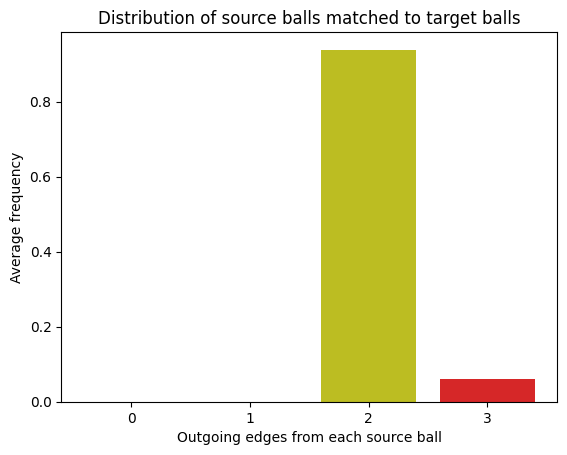

In [7]:
# fig, ax = plt.subplots()
bar_colors=["tab:olive","tab:red"]
# ins = np.where(avg_m_statistics > 1e-8)[0]
plt.bar(possible_m,avg_m_statistics,color=bar_colors)
plt.xticks(possible_m)
plt.title("Distribution of source balls matched to target balls")
plt.ylabel("Average frequency")
plt.xlabel("Outgoing edges from each source ball")
plt.show()

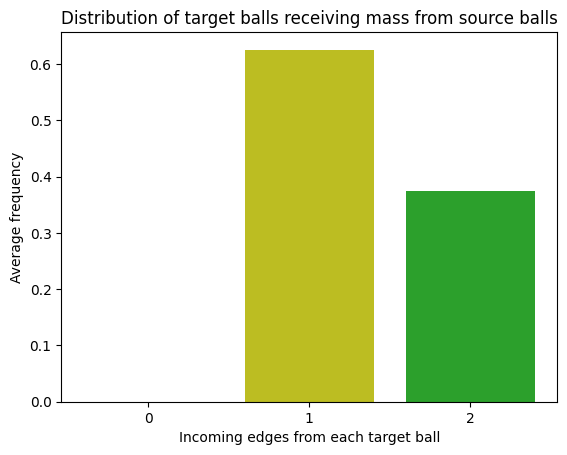

In [8]:
bar_colors=["tab:green","tab:olive"]
plt.bar(possible_n,avg_n_statistics,color=bar_colors)
plt.xticks(possible_n)
plt.title("Distribution of target balls receiving mass from source balls")
plt.ylabel("Average frequency")
plt.xlabel("Incoming edges from each target ball")
plt.show()

### Example 3

100%|██████████| 200/200 [00:00<00:00, 2320.56it/s]


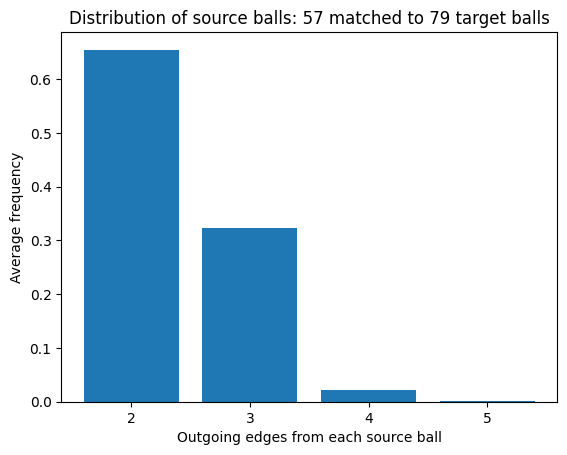

<Figure size 640x480 with 0 Axes>

In [9]:
n = 57
m = 79
it = 200
m_array, n_array, possible_m, possible_n = sim_OT(m,n,it)
avg_m_statistics = np.mean(m_array, axis=0)
avg_n_statistics = np.mean(n_array, axis=0)
plot_func(avg_m_statistics,avg_n_statistics,possible_m,possible_n,receive=False,save=True)
# plt.savefig("/Users/Johnson/Documents/Stefan_Research/Writeup/images/57-79.png")

## Coprime numbers where one is small, and the other is large

### Example 4

100%|██████████| 200/200 [00:00<00:00, 3195.20it/s]


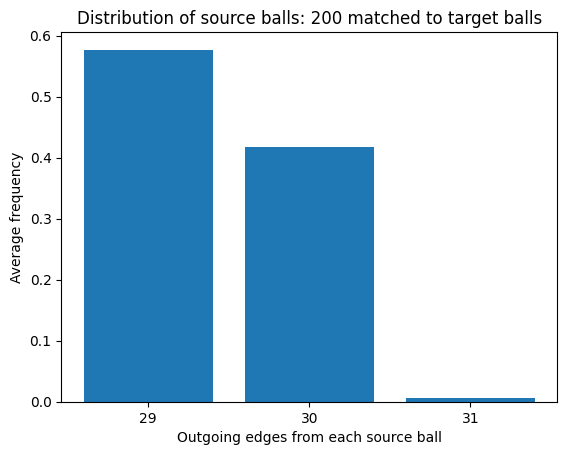

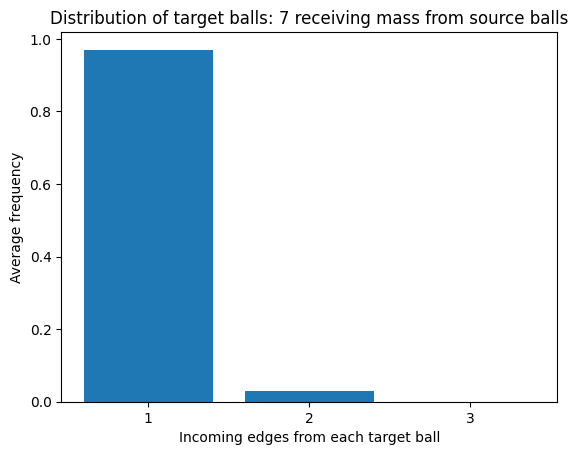

In [10]:
n = 7
m = 200
it = 200
m_array, n_array, possible_m, possible_n = sim_OT(m,n,it)
avg_m_statistics = np.mean(m_array, axis=0)
avg_n_statistics = np.mean(n_array, axis=0)
plot_func(avg_m_statistics,avg_n_statistics,possible_m,possible_n)

### Example 5

100%|██████████| 200/200 [00:00<00:00, 244.35it/s]


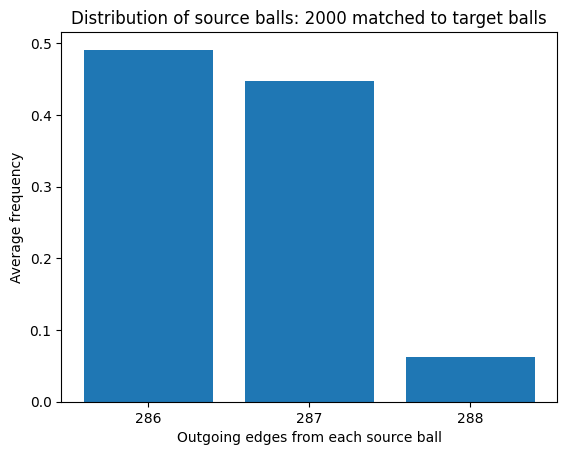

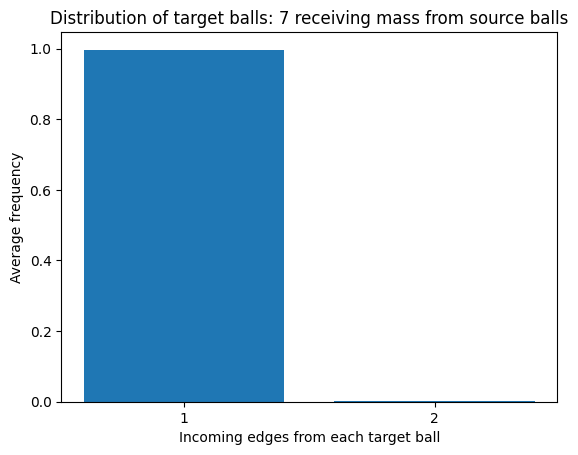

In [11]:
n = 7
m = 2000
it = 200
m_array, n_array, possible_m, possible_n = sim_OT(m,n,it)
avg_m_statistics = np.mean(m_array, axis=0)
avg_n_statistics = np.mean(n_array, axis=0)
plot_func(avg_m_statistics,avg_n_statistics,possible_m,possible_n)

In [12]:
avg_n_statistics

array([0.   , 0.997, 0.003, 0.   , 0.   , 0.   , 0.   , 0.   ])

## Large coprime numbers (That can be prime, doesn't matter)

### Example 6

100%|██████████| 200/200 [00:10<00:00, 19.96it/s]


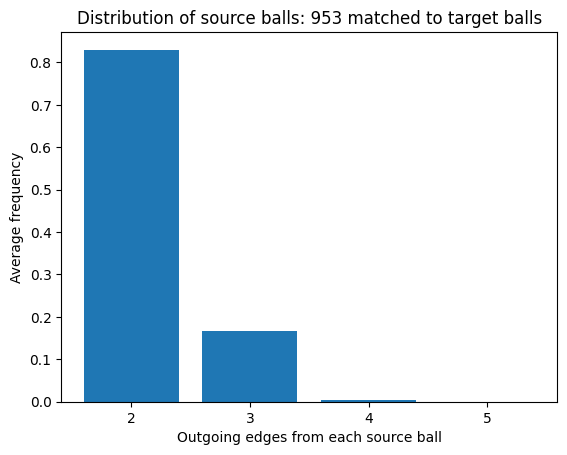

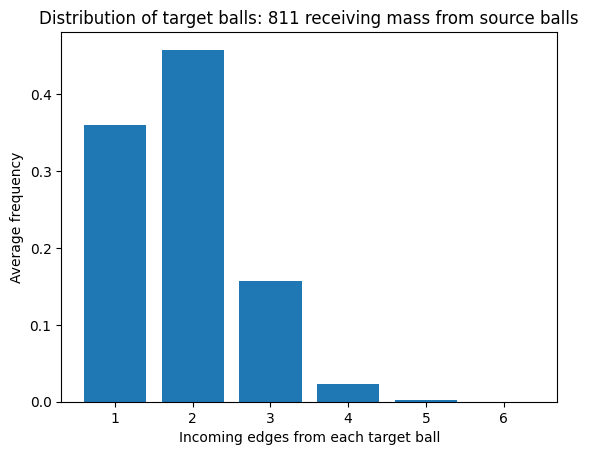

In [11]:
n = 811
m = 953
it = 200
m_array, n_array, possible_m, possible_n, G0 = sim_OT(m,n,it)
avg_m_statistics = np.mean(m_array, axis=0)
avg_n_statistics = np.mean(n_array, axis=0)
plot_func(avg_m_statistics,avg_n_statistics,possible_m,possible_n)

In [14]:
np.unique(G0[0,:])

array([0.        , 0.00018373, 0.00104932])

In [16]:
np.sort(np.unique(G0))

array([0.00000000e+00, 3.88157069e-06, 6.46928448e-06, 7.76314138e-06,
       9.05699828e-06, 1.68201397e-05, 1.81139966e-05, 2.07017103e-05,
       2.07017103e-05, 2.32894241e-05, 2.45832810e-05, 2.84648517e-05,
       2.97587086e-05, 3.23464224e-05, 3.49341362e-05, 3.62279931e-05,
       4.14034207e-05, 4.65788483e-05, 4.91665621e-05, 4.91665621e-05,
       5.30481328e-05, 5.30481328e-05, 5.69297035e-05, 5.82235604e-05,
       6.08112742e-05, 6.98682724e-05, 7.37498431e-05, 7.76314138e-05,
       8.15129845e-05, 8.28068414e-05, 8.41006983e-05, 8.53945552e-05,
       8.53945552e-05, 8.92761259e-05, 9.44515535e-05, 9.83331242e-05,
       9.96269811e-05, 1.00920838e-04, 1.02214695e-04, 1.06096266e-04,
       1.07390122e-04, 1.09977836e-04, 1.09977836e-04, 1.11271693e-04,
       1.22916405e-04, 1.26797976e-04, 1.30679547e-04, 1.34561117e-04,
       1.34561117e-04, 1.42324259e-04, 1.47499686e-04, 1.48793543e-04,
       1.51381257e-04, 1.53968971e-04, 1.55262828e-04, 1.59144398e-04,
      

### Example 7

100%|██████████| 200/200 [00:00<00:00, 1154.54it/s]


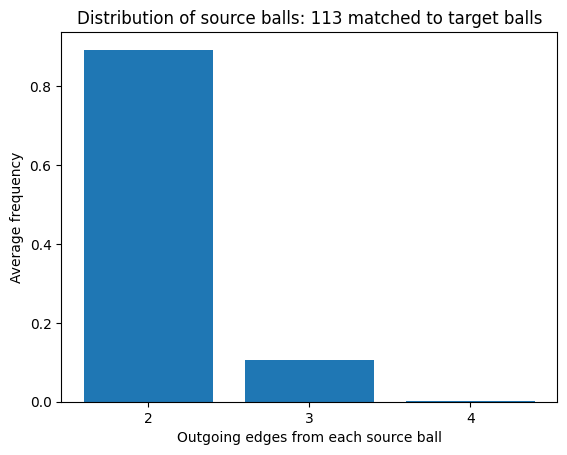

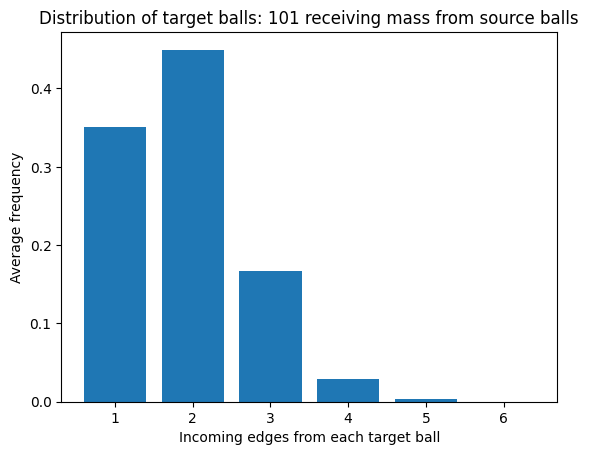

In [17]:
n = 101
m = 113
it = 200
m_array, n_array, possible_m, possible_n, G0 = sim_OT(m,n,it)
avg_m_statistics = np.mean(m_array, axis=0)
avg_n_statistics = np.mean(n_array, axis=0)
plot_func(avg_m_statistics,avg_n_statistics,possible_m,possible_n)

In [19]:
np.unique(G0)

array([0.        , 0.00017524, 0.00026286, 0.00035048, 0.0004381 ,
       0.00052572, 0.00061334, 0.00078857, 0.00087619, 0.00105143,
       0.00105143, 0.00122667, 0.00131429, 0.00140191, 0.00148953,
       0.00157715, 0.00166477, 0.00175239, 0.00184001, 0.00201525,
       0.00210287, 0.00219048, 0.0022781 , 0.00236572, 0.00245334,
       0.00254096, 0.00262858, 0.0027162 , 0.00306668, 0.0031543 ,
       0.0031543 , 0.00324192, 0.00341716, 0.00350478, 0.00359239,
       0.00368001, 0.00403049, 0.00420573, 0.00446859, 0.00464383,
       0.00481907, 0.00490669, 0.0049943 , 0.00508192, 0.00525716,
       0.0054324 , 0.00569526, 0.0058705 , 0.0063086 , 0.00639621,
       0.00648383, 0.00665907, 0.00674669, 0.00674669, 0.00683431,
       0.00727241, 0.00736003, 0.00744765, 0.00753527, 0.00762289,
       0.00779812, 0.00806098, 0.00823622, 0.00832384, 0.00841146,
       0.00849908, 0.0085867 , 0.00867432, 0.00884956])

### Example 8

100%|██████████| 200/200 [00:26<00:00,  7.52it/s]


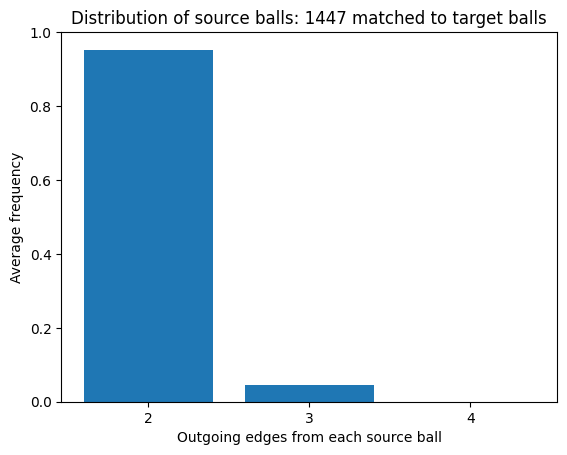

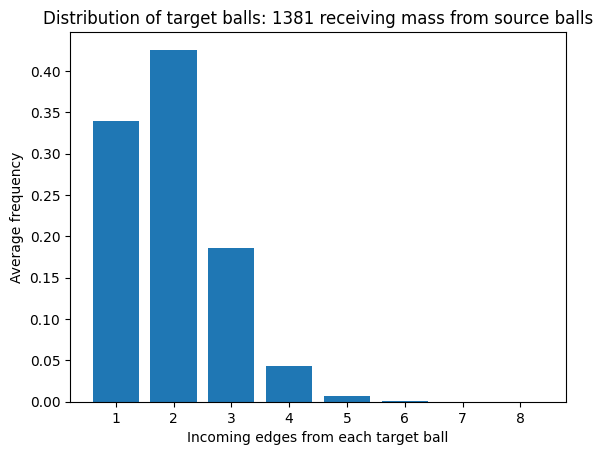

In [15]:
n = 1381
m = 1447
it = 200
m_array, n_array, possible_m, possible_n = sim_OT(m,n,it)
avg_m_statistics = np.mean(m_array, axis=0)
avg_n_statistics = np.mean(n_array, axis=0)
plot_func(avg_m_statistics,avg_n_statistics,possible_m,possible_n)

100%|██████████| 200/200 [00:14<00:00, 13.79it/s]


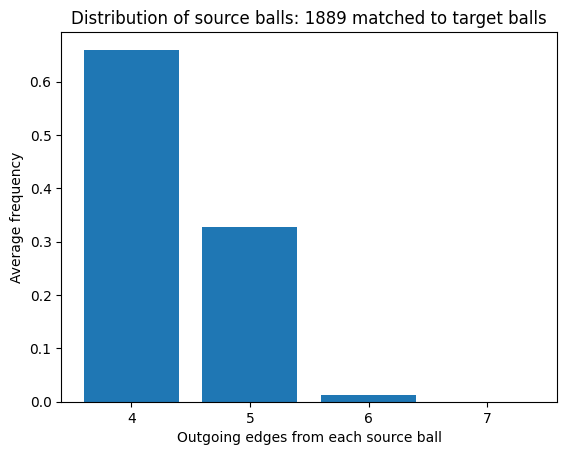

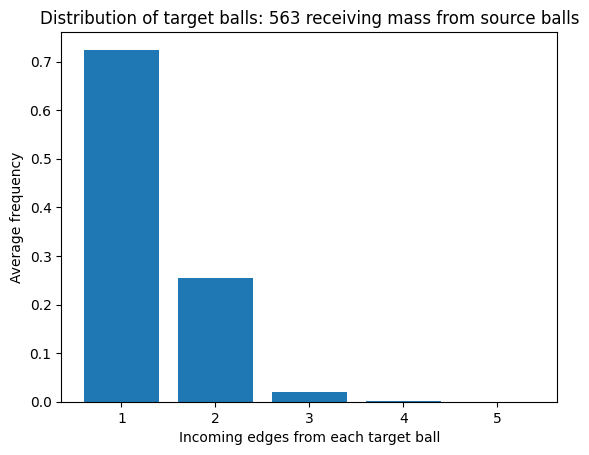

In [25]:
# Large coprime distance
n = 563
m = 1889
it = 200
m_array, n_array, possible_m, possible_n = sim_OT(m,n,it)
avg_m_statistics = np.mean(m_array, axis=0)
avg_n_statistics = np.mean(n_array, axis=0)
plot_func(avg_m_statistics,avg_n_statistics,possible_m,possible_n)

## Numbers that aren't necessarily coprime

### Example 9

100%|██████████| 200/200 [00:00<00:00, 2168.82it/s]


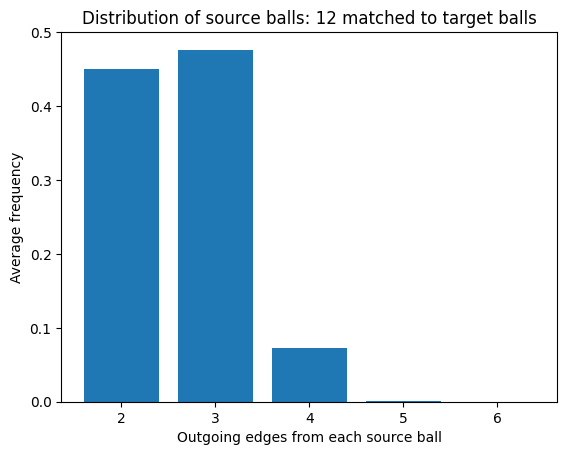

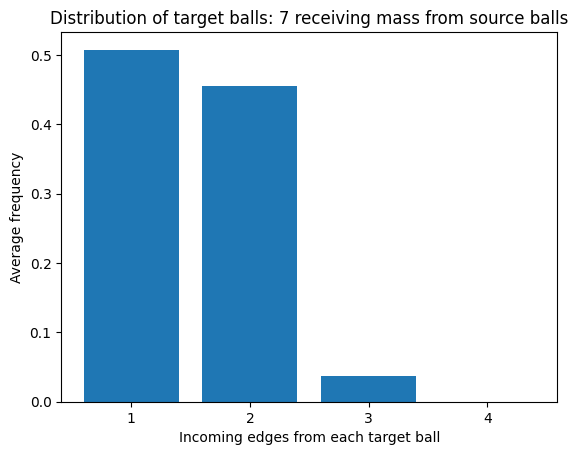

In [16]:
n = 56
m = 96
it = 200
m_array, n_array, possible_m, possible_n = sim_OT(m,n,it)
avg_m_statistics = np.mean(m_array, axis=0)
avg_n_statistics = np.mean(n_array, axis=0)
plot_func(avg_m_statistics,avg_n_statistics,possible_m,possible_n)

### Example 10

100%|██████████| 200/200 [00:33<00:00,  6.04it/s]


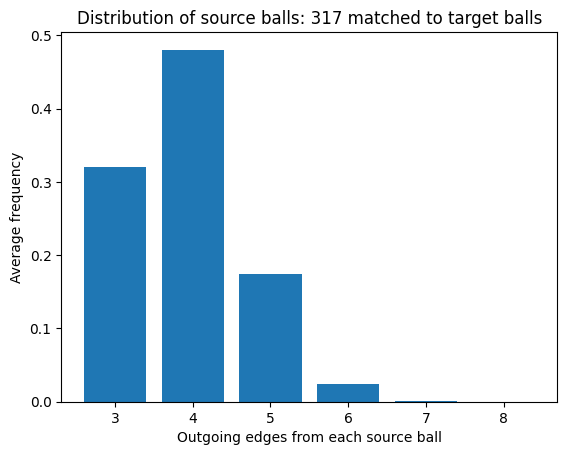

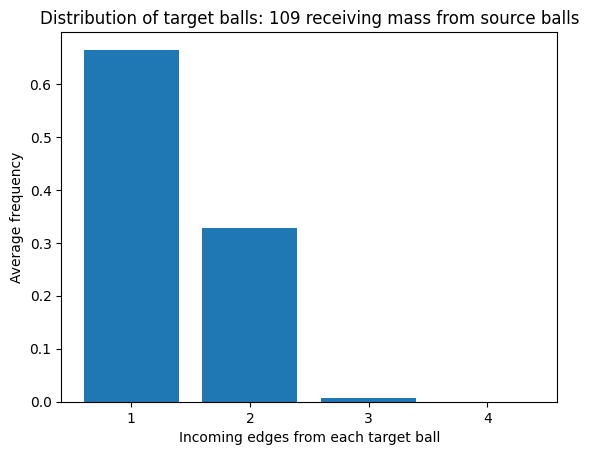

In [18]:
n=109*8
m=317*8
it = 200
m_array, n_array, possible_m, possible_n = sim_OT(m,n,it)
avg_m_statistics = np.mean(m_array, axis=0)
avg_n_statistics = np.mean(n_array, axis=0)
plot_func(avg_m_statistics,avg_n_statistics,possible_m,possible_n)

### Example 11

100%|██████████| 200/200 [00:11<00:00, 17.45it/s]


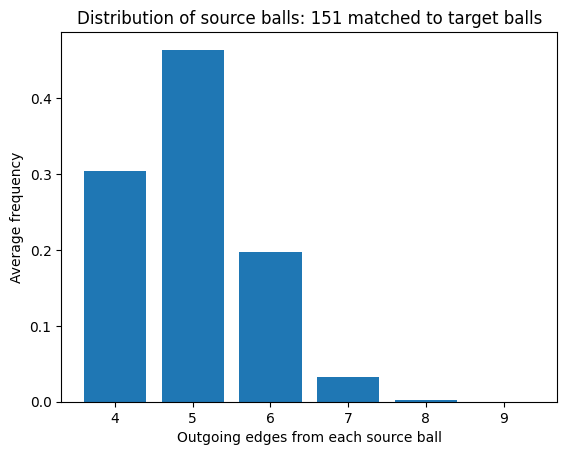

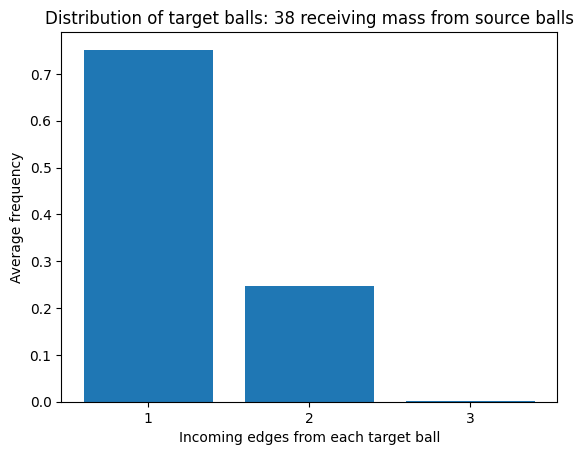

In [21]:
m = 1812
n = 456
it = 200
m_array, n_array, possible_m, possible_n = sim_OT(m,n,it)
avg_m_statistics = np.mean(m_array, axis=0)
avg_n_statistics = np.mean(n_array, axis=0)
plot_func(avg_m_statistics,avg_n_statistics,possible_m,possible_n)

100%|██████████| 200/200 [00:00<00:00, 6446.23it/s]


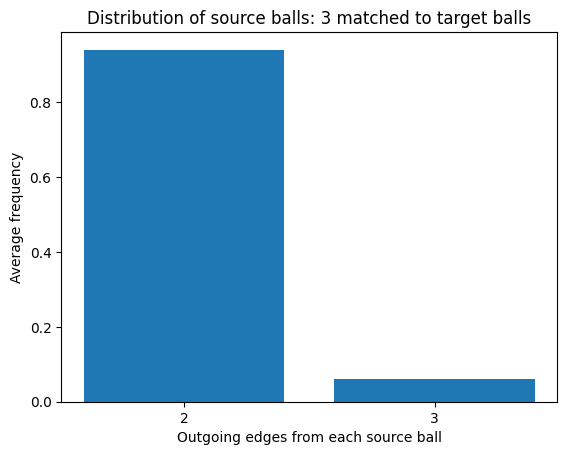

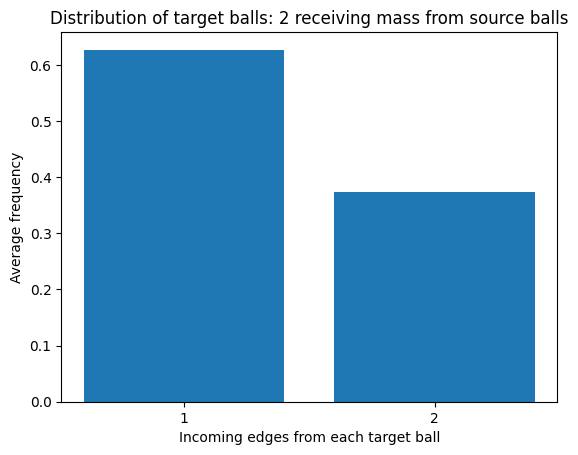

In [24]:
m = 30
n = 20
it = 200
m_array, n_array, possible_m, possible_n = sim_OT(m,n,it)
avg_m_statistics = np.mean(m_array, axis=0)
avg_n_statistics = np.mean(n_array, axis=0)
plot_func(avg_m_statistics,avg_n_statistics,possible_m,possible_n)

## Explanations

One thing that is clear to observe is that the higher matching number blue matching to red happens way less often than the analogous result for red to blue. Why is that the case? 3 and 2 are both the extreme possible solutions, so why is it so much more likely that a red dot matches to two blue dots and not one blue dot matching to 3 red dots?

Question 1: Do different GCDs, like coprime numbers. See if we can find some kind of pattern with the GCDs. Distribution shouldn't matter too much.

Look at references:
1. Beardwood, Helton, Hammersley
2. J.M. Steele. Theorem: $\lim_{n \to \infty} \frac{\mathrm{TSP}(n)}{\sqrt{n}} = \beta$, where we think $0.5 \leq \beta \leq 0.9$.

Look at Subadditive Geometric Euclidean Functionals 

HW:
1. Check whether p (this is the Wasserstein) matters? Prioritize p = 1
2. Larger numbers, what happens?
3. Read Steele, paper above. Also, maybe Yukich - Probability Theory of Classical Euclidean Optimization Problems.

1. In none of the cases I tried out, the value of $p$ didn't matter. So I'm just going to prioritize $p=1$.
2. I want to try numbers that have a big difference with their coprime counterpart, which is why I did the 7 and 200 and 2000. I now want to try numbers that are large and coprime. I tried something just random like 57 and 79, but I'm going to use larger coprime numbers and see what happens.
3. I read Steele, and it compares the subadditive geometric Euclidean functionals to shortest paths like the optimum value for TSP. You can prove Beardwood, Helton, and Hammersley using Steele's methods with the Euclidean functionals. They have to satisfy various important assumptions like scaling, monotonicity and finite variance, which create ubiquitous use cases. The subadditivity hypothesis is a little bit harder to show, but is still general enough to be useful in a lot of circumstances, for a lot of different functionals (or paths in the context we care about).

C-cyclic monotonicity

HW:

1. Look at reasonably sized examples, sample from a square, for example, and look for forbidden subgraphs that shouldn't appear but that do appear. Literally just do OT_Solver and look at the graphs and see if there is something appearing like in the bottom of the picture.
2. Top left in picture
3. 

In [20]:
G0.shape

(101, 113)

In [22]:
np.random.uniform(low=0.0, high=1.0, size=(n,m)).shape

(101, 113)

In [11]:
import torch

a = torch.rand(5,5)

In [14]:
a.reshape(-1,5)

tensor([[0.8284, 0.0953, 0.6401, 0.3116, 0.3161],
        [0.0510, 0.2542, 0.5912, 0.7279, 0.3921],
        [0.1243, 0.6128, 0.9994, 0.2157, 0.4095],
        [0.2930, 0.1239, 0.9582, 0.9158, 0.1139],
        [0.1569, 0.7090, 0.9863, 0.0421, 0.8988]])

In [22]:
Xt = torch.rand(100,2)
Xt = Xt.reshape(-1,1,2)

In [25]:
Xp = torch.rand(100,2)
Xp = Xp.reshape(1,-1,2)

In [26]:
diff = Xt - Xp
diff.shape

torch.Size([100, 100, 2])

In [28]:
Xp.size()

torch.Size([1, 100, 2])